<a href="https://colab.research.google.com/github/danccas/SPAM-Detector/blob/master/MLP_3_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Perceptrón Multicapa**

 En esta prueba modificaremos nuestro MLP según las capas **3:2:1**,
 utilizaremos un vector de características para representar un texto.

Nuestra finalidad es clasificar automáticamente los textos y determinar su eficiencia en términos de accuracy o exactitud.

**Librerias:**

Vamos a realizar la importación de librerias necesarias para aplicar nuestro MLP, y procesos como la vectorización y clasificación.

In [ ]:
import string
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk import PorterStemmer as Stemmer
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Vamos a instalar nltk, de esta forma realizaremos una limpieza del texto previa a su vertorización.

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Vamos a montar nuestro disco Drive, donde tenemos nuestro dataset de spam

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


**Dataset:**

Hemos usado el dataset de Kaggle, un reconocido repositorio, el cual nos provee 5572 lineas de mensajes etiquetados para su posterior aprendizaje.

Link: https://www.kaggle.com/uciml/sms-spam-collection-dataset


Importamos el dataset asignando dos columnas:

In [ ]:
read_file  = pd.read_csv('gdrive/My Drive/Colab Notebooks/SOM/datasets_483_982_spam.csv', encoding='latin-1')[['v1', 'v2']]
read_file.columns = ['label', 'message']
read_file.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


Devuelve una tupla que representa la dimensionalidad del DataFrame

In [ ]:
read_file.shape

(5572, 2)

Vamos a realizar un agrupamiento por la etiqueta

In [ ]:
read_file.groupby('label').describe()

message                                                               
        count unique                                                top freq
label                                                                       
ham      4825   4516                             Sorry, I'll call later   30
spam      747    653  Please call our customer service representativ...    4

Realziaremos una grafica del agrupamiento binario ham/spam

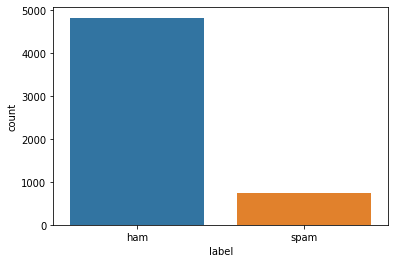

In [ ]:
sns.countplot(data=read_file, x='label') 

**Procesamiento de Texto:**

Limpiar y normalizar texto, se realiza los siguientes pasos:

1.   Eliminar signos de puntuación
2.   Eliminar todas las palabras vacías
3.   Aplicar derivación (conversión a forma normal de palabra). Por ejemplo, 'conduciendo automóvil' y 'conduces automóvil' se convierte en conducir automóvil


In [ ]:
def text_processing(text_):
    text_ = text_.lower()
    text_ = ''.join([i for i in text_ if i not in string.punctuation])
    text_ = [i for i in text_.split() if i not in stopwords.words('english')]
    string_ = Stemmer()
    text_ = [string_.stem(i) for i in text_]
    return text_ 

text_processing('driving car')

['drive', 'car']

Utilizaremos TfidfVectorizer. Convertirá la colección de documentos de texto (corpus de SMS) en una matriz 2D. Una dimensión representa documentos y otra dimensión repite cada palabra única en el corpus de SMS...

In [ ]:
tfidfv = TfidfVectorizer(analyzer=text_processing)  # Tfid
data_processing = tfidfv.fit_transform(read_file['message'])
type(data_processing)
data_processing = data_processing.toarray()  # convertirmos la matriz a un array para el modelo

In [ ]:
data_processing.shape  # comprobar la forma de la matriz

(5572, 8097)

In [ ]:
labels =  read_file['label']  # almacena etiquetas en otra variable para que podamos usarlo para entrenamiento

**Aprendizaje y Predicción:**

1. El algoritmo escogido para la solución es un optimizador estocástico basado en gradiente propuesto por Kingma, Diederik y Jimmy Ba.
2. La función de activación de la capa oculpa escogida es la función tan hiperbólica, devuelve f (x) = tanh (x)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data_processing, labels, stratify=labels)
model = MLPClassifier(solver='adam', activation='tanh', alpha=1e-5, hidden_layer_sizes=(3, 2, 1), random_state=1, max_iter=500)
model = model.fit(X_train, y_train)  # Entrenar

In [ ]:
predicted = model.predict(X_test)  # Predecir 

In [ ]:
print(classification_report(y_test, predicted))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99      1206
        spam       0.98      0.88      0.93       187

    accuracy                           0.98      1393
   macro avg       0.98      0.94      0.96      1393
weighted avg       0.98      0.98      0.98      1393



**Conclusión:**

*MLP 2:2:1*: Se tiene una precisión del 99% en la predicción del ham, así como 96% para spam. Teniendo una precisión total de 97%.

*MLP 3:2:1*: Se tiene una precisión del 98% en la predicción del ham, así como 98% para spam. Teniendo una precisión total de 98%.

*MLP 3:3:1*: Se tiene una precisión del 99% en la predicción del ham, así como 97% para spam. Teniendo una precisión total de 98%.

**Se concluye que los MLP 3:2:1 y 3:3:1 tienen una mayor precisión en la predicción de spam y ham.**